## Brownian Motion Simulation

**February 4, 2024**  
**Jake Bobowski**

A toy model to simulate the settling of particles suspended in a solution due to gravity.  The simulation works as follows:

 - $N$ particles are randomly placed inside a 2-D chamber ($1\rm\ unit \times 1\rm\ unit$ in size).
 - Binomial distributions are used to determine if each particle:
     - steps left or right
     - steps up or down
 - The is an equal probability that a particle steps left or right.
 - To incorporate the effects of gravity, the particles are given a greater probability of stepping down than up.
 - Normal distributions are used determine the size of the horizontal and vertical steps.
 - The particle positions are updated according to the step sizes and directions.
     - If an x-coordinate becomes negative, its position is changed to $1 + x$.  That is particles that cross the left boundary reappear near the right boundary.
     - If an x-coordinate becomes greater than $1$, its position is changed to $x - 1$.  That is particles that cross the right boundary reappear near the left boundary.
     - If a y-coordinate becomes negative, its position is changed to $y = 0$.  
     - If a y-coordinate becomes greater than $1$, its position is changed to $y = 1$. '
 - The initial positions of the $N$ particles are plotted as cyan points.
 - The positions of the particles are updated dynamically as the loop executes.  The updated positions are plotted in orange.
 - With each iteration of the loop, the particle number versus height in the chamber is tracked.
 - The natural logarithm of the counts versus height is plotted.  This plot is also updated dynamically.
 - Initially, the particles are distributed uniformly, so the plot of the counts versus height is flat.
 - Eventually, a new equilibrium is reach in which the particle distribution decreases exponentially with increasing height.  This distribution is the <a href = "https://en.wikipedia.org/wiki/Barometric_formula">barometric distribution</a>.
 - When the new equilibrium is reached, ln(counts) versus height is linear with a negative slope.
 
The block of code below takes approximately 2 minutes to run.
     

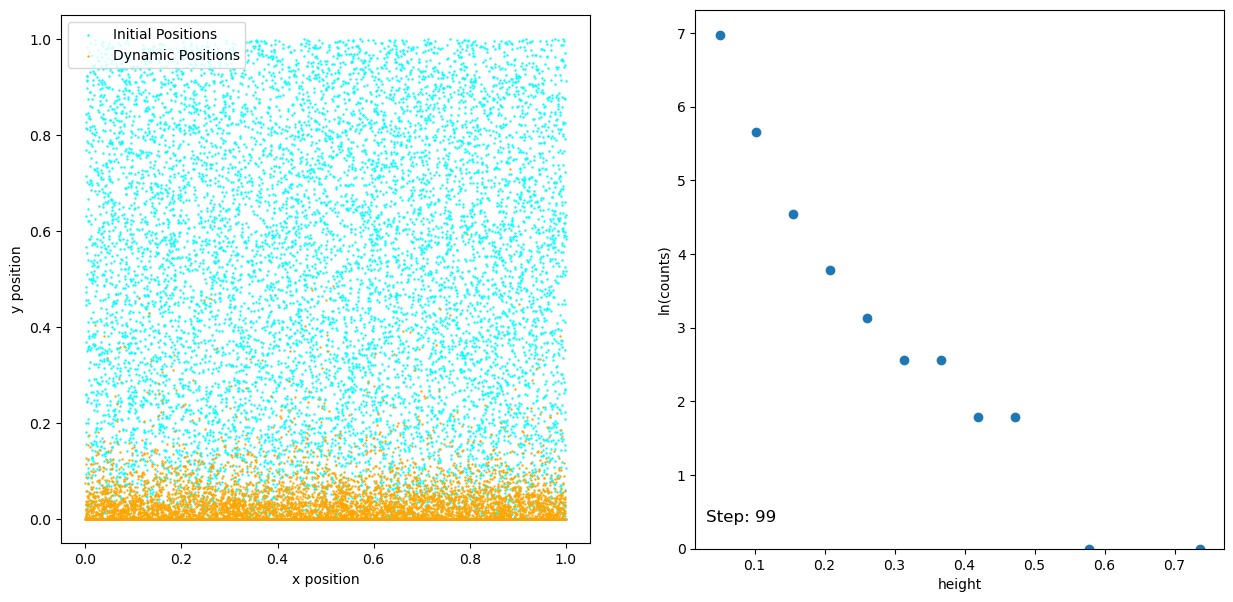

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore") # Suppress warning messages that appear when evaluating instances of ln(0) in np.log(count).
    
    N = int(1e4) # Number of particles
    num_steps = int(1e2) # Number of interations/steps

    x = np.random.rand(N) # Step the initial coordinates of the N particles.
    y = np.random.rand(N)

    x_initial = x.copy() # Copy in the initial coordinates.
    y_initial = y.copy()

    fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 7)) # Set up the plots to be dynamically updated while the loop runs.
    ax.set_aspect('equal')

    h = np.linspace(0.05, 1, 19) # We will determine the particle density as a function of the height h from the bottom of the y-range.
    bin_edges = np.linspace(0.05, 1, 20) # We will count the particles between for 0.05 < y < 0.1, 0.1 < y < 0.15, ..., 0.95 < y < 1.

    for step in range(num_steps):
        dx = np.random.binomial(1, 0.5, N) # For each step, the probabilty of a particle scattering left or right is the same. 
        dy = np.random.binomial(1, 0.25, N) # There is a greater probability that a particle moves down because of gravity.
        
        x_step = abs(np.random.normal(0, 1, N) * 3e-2) # Randomize the sizes of the steps in the x and y directions for each particle and each iteration of the loop.
        y_step = abs(np.random.normal(0, 1, N) * 3e-2)

        x += np.where(dx == 0, -x_step, x_step) # Update the x coordinates. 
        x = np.where(x < 0, x + 1, x) # If x < 0, add 1.  A particle that moves past the left boundary will appear near the right boundary.
        x = np.where(x > 1, x - 1, x) # If x > 1, subtract 1.  A particle that moves past the right boundary will appear near the left boundary.

        y += np.where(dy == 0, -y_step, y_step) # Update the y coordinates.        
        y = np.clip(y, 0, 1) # Particles that go beyond the top boundary (y > 1) have their y-coordinate reset to y = 1.
        # Particles that go beyond the lower boundary (y < 0) have their y-coordinate reset to y = 0. 

        ax.clear()
        ax.scatter(x_initial, y_initial, s=0.5, color='cyan', label='Initial Positions') # Plot the initial positions of the particles.
        ax.scatter(x, y, s=0.5, color='orange', label='Dynamic Positions') # Dynamically plot the new positions. 
        ax.legend(loc='upper left')
        ax.set_xlabel("x position")
        ax.set_ylabel("y position")

        display(fig)
        clear_output(wait=True)
        time.sleep(1e-4)

        count, _ = np.histogram(y, bins=bin_edges) # Determine the particle cound has a function of the height h.
        
        ax1.clear()
        ax1.scatter(h, np.log(count)) # Plot the ln of the particle count as a function of h.  The very bottom of the particle chamber (0 < y < 0.05) is excluded. 
        ax1.set_ylim(0, None)  # Set the minimum y-range to be zero
        ax1.annotate(f'Step: {step}', xy=(0.02, 0.05), xycoords='axes fraction', fontsize=12, color='black')
        ax1.set_xlabel("height")
        ax1.set_ylabel("ln(counts)")